In [1]:
%load_ext autoreload
%autoreload 2

# Predicción de Ingresos de clientes de una Fintech

## 1.  Objetivo

El ingreso puede ser definido cómo la suma de dinero recibido dado en un periodo específico de tiempo.

Este trabajo tiene cómo objetivo predecir, a partir de distintas técnicas de machine learning, el ingreso de una persona a partir de su información financiera pública y su declaración de ingresos.

Buscaremos comparar metodologías con respecto al paper "Enhancing User' s Income Estimation with Super-App Alternative Data de Gabriel Suarez et al. (2021)" y "Benchmarking regression algorithms for income prediction modeling. Information Systems, Kibekbaev, A., & Duman, E. (2016)"

Nuestro objetivo es unívoco, al igual que nuestro target, poseemos comprobantes de ingresos digitalizados de casi 27mil clientes de una empresa de préstamos online [3]. Dado la literatura ya mencionada, comprobaremos si el historial crediticio permite inferir el ingreso de un cliente.

## 2. Contexto

 Tradicionalmente los grandes jugadores del mercado financiero han sido los bancos. Sin embargo el rapido desarrollo de la economía ha girado hacia los mercados digitales. Los mercados financieros han sido transformados por la tecnología financiera. [5] La innovadora tecnología ha creado distintos modelos de negocio... Estos afectan a diferentes aspectos de la economía, incluyendo servicios de pagos, la industria bancaria tradicional y las regulaciones financieras. [6] Desde el 2014 un nuevo término ha entrado al vocabulario público: Fintech (Pedersen,2015; Rysman, M. and S. Schuh ,2016). Fintech es un nuevo tipo de innovación digital y tecnológica que permite nuevos modelos de negocios en el sector financiero (Abraham, F,2019). Fintech incluye áreas de negocio tradicionales, préstamos, transferencias, y también nuevas áreas, blockchain, criptomonedas, sistemas de trading, préstamos peer-to-peer y crowdfunding. (Philippon, 2015; Darolles,2016). La aparición de las fintech ha jugado un rol significativo en la mejora de servicios provistos por las empresas tradicionales (Berg and Burg, 2019). La aplicación de tecnologías permite reducir costos de adquisición y control de riesgos, reducir costos operativos y mejorar la eficiencia, habilitando un servicio para un amplio rango de consumidores (Allen and Gale, 2000;).

En el siguiente trabajo, estudiaremos la data de una empresa que permite a un cliente crear una aplicación para un préstamo de manera online. Nos enfocaremos en los algoritmos que permiten reducir el riesgo y aumentar la escala, posibilitando la aprobación automática de estas solicitudes.



[1] "Enhancing User' s Income Estimation with Super-App Alternative Data de Gabriel Suarez et al. (2021)"

[2] Kibekbaev, A., & Duman, E. (2016). Benchmarking regression algorithms for income prediction modeling. Information Systems, 61, 40–52. doi:10.1016/j.is.2016.05.001

[3] Leong, K. and Sung, A. (2018) ‘FinTech (Financial Technology): What is It and How to Use
Technologies to Create Business Value in Fintech Way?’, International Journal of Innovation,
Management and Technology, vol. 9, no. 2, pp. 74-78. Available at:
http://www.ijimt.org/index.php?m=content&c=index&a=show&catid=93&id=1138.

[4]MC-PF-INTL-TEC-V.13/ V.034 (Manual Técnico INTL - Julio 2020)


[5] Skan, J., Dickerson, J., & Masood, S. 2015. The future of fintech and banking: Digitally disrupted or
reimagined? Tech. rept. Accenture. Available: http://www.accenture.com/us-en/Pages/insight-futurefintech-banking.aspx. Accessed 14 November 2016.

[6] Salmony, M. 2014. Access to accounts: Why banks should embrace an open future. Journal of payments strategy & systems, Vol. 8, Issue 2, 169–170.



## 3. Riesgo

Capacidad créditicia se define cómo "la capacidad provista a un individuo por el sistema financiero donde los clientes reciben un valor monetario... El límite de endeudamiento de un individuo es decidido por una combinación de factores que, por lo general, prestadores deciden en función de factores cómo el poder de compra y el ingreso, dado que estos permite determinar cuanto se le puede prestar a un individuo" [2].

En nuestro estudio mediremos esa capacidad en función de solicitudes de préstamos.

> El término préstamo se refiere a un tipo de operación financiera en la cual se presta una suma de dinero a otra parte a cambio de un reembolso futuro del valor o monto principal. En muchos caos, el prestamista también agrega intereses y/o cargos financieros al valor del principal que el prestatario debe pagar... Los préstamos vienen en muchas formas diferentes, incluyendo préstamos garantizados, no grantizados, comerciales y personales

El préstamo conlleva una promesa futura de pago. El desafío radica en que cada cliente tiene una probabilidad diferente de incumplir con sus obligaciones particulares. Esa probabilidad está determinada por características psicológicas individuales de cada cliente [7] junto con sus conocimientos financieros, también por características demográficas y factores situacionales [8]. A su vez cada probabilidad está asignada a un monto de dinero entregado al momento de la aprobación (Pérdida dado el default) [7,8,9,10].

Es así que las entidades financieras tienen que responder a dos cuestiones fundamentales para su correcta gestión del riesgo de crédito:

* 1) ¿A qué clientes prestarles?
* 2) ¿Cuál es el monto a prestar?

Para abordar la segunda pregunta, es necesario que las instituciones financieras estimen la capacidad de pago de cada uno de sus clientes. Calcular correctamente la cantidad de dinero que deben prestar a sus clientes permite a las instituciones financieras estimar con precisión su exposición en caso de incumplimiento (Exposición al default) [1], lo que finalmente lleva a las organizaciones a operar dentro de su pérdida esperada deseada, en correspondencia con su aversión por el riesgo.

En nuestro caso de estudio el negocio opera por una definición de capacidad de pago y por una regla de aprobación. Esta se deriva de un ingreso disponible determinado cómo el ingreso que la persona recibe de su actividad económica principal menos los gastos corrientes, determinados cómo la cantidad de personas a cargo (Declarada a voluntad por los clientes) y de los pagos a otras instituciones financieras. Ese ingreso disponible debe permitir pagar al menos dos cuotas mensuales del préstamo. La regla se resume matematicamente del a siguiente manera:

$$
  \text{Capacidad de Pago} = \frac{\text{Ingreso real} - 2000*Dependientes - Pagos a Bureau}{Mensualidad} >= 2
$$

> Capacidad de Pago representaría un ratio de liquidez dado por cuantas cuotas o mensualidades de un préstamo puede pagar el ingreso disponible de un cliente-


Se observa que la ecuación de capacidad de pago tiene aclarada la variable "Ingreso Real". Tradicionalmente, las entidades financieras toman como punto de partida la declaración de ingresos de los usuarios. Comprobaremos en nuestro trabajo, un hecho conocido, la disposición de los consumidores a proporcionar la información sobre ingresos reales es relativamente baja, ya que pertenece a informaciópn sensible [11]. Esto, lleva a las instituciones financieras a intentar estimar los ingresos de los usuarios a partir de la información financiera disponible, y en algunos casos tener que requerirlo a terceras instituciones que recopilan este tipo de datos. Esta estimación es, para algunas organizaciones, el mejor indicador para conocer esta característica relevante del usuario.

## 4. Fuentes de información

La información para predecir el ingreso de un cliente estará basada en dos fuentes de datos por un lado la declaración de la persona y la información de su historial créditicio. , y la información del historial crediticio que obtuvimos del Buró de crédito desarrollado por la empresa TransUnion de México, S.A. SIC [4], qué tiene cómo objetivo "Proporcionar información acerca del Historial Crediticio de las Personas y/o Empresas, de forma clara, eficaz, eficiente y oportuna que aporte para la correcta toma de decisiones."


[7] Basel Committee on Banking Supervision: The internal ratings-based approach (2001), Consultative Document

[8]  Tokunaga, H.: The use and abuse of consumer credit: Application of psychological theory and research. Journal of
economic psychology 14(2), 285–316 (1993)

[9]  Perry, V.G.: Giving credit where credit is due: the psychology of credit ratings. The Journal of Behavioral Finance 9(1), 15–21 (2008)

[10]  Schuermann, T.: What do we know about loss given default? (2004)

[11] Salvaire, P.: Explaining the predictions of a boosted tree algorithm : application
to credit scoring. Master’s thesis, Universidade Nova de Lisboa (2019)

[12] Phelps, J., Nowak, G., Ferrell, E.: Privacy concerns and consumer willingness to provide personal information. Journal of Public Policy & Marketing 19(1), 27–41 (2000)

# Dataset

Nuestros datos están divididos en dos sets. Uno de prospectos, es decir, 12.997 clientes que ingresaron sus datos personales y llegaron a presentar comprobantes de ingresos pero por alguna razón no accedieron a préstamos. Por otro lado,13943 clientes que accedieron a un préstamo.

Vale estudiar si se tratan de dos poblaciones distintas. Esto es respecto a variables de riesgo crediticio e ingreso, o si se trata de dos conjuntos que pueden ser estudiados cómo unidad.


In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import os
import gc
from income.data_validation import quality_check,missing_threshold,df_optimized,drop_constant_column

In [3]:
path = "../data/"
prospectos = pd.read_csv(path + "prospectos.csv", index_col=0)
prospectos.shape

(12997, 49)

In [4]:
aprobados = pd.read_csv(path + "aprobados.csv", index_col=0, usecols=prospectos.columns)
aprobados.shape

(13943, 48)

In [5]:
raw_df = pd.concat([aprobados, prospectos], ignore_index=True, sort=False)
del aprobados
del prospectos
raw_df.shape

(26940, 49)

In [6]:
gc.collect()

0

In [7]:
raw_df = df_optimized(raw_df)

optimized size by 52.0 % | 0.005091788 GB


In [8]:
quality_check(raw_df)

Evaluation uniques an Nan by Column


,column_name,percent_missing,percent_unique,sample_values
48,declarativa,100.000000,0.000000,[nan]
43,nombre del score,100.000000,0.000000,[nan]
3,mensaje de alerta,100.000000,0.000000,[nan]
4,moneda del credito,100.000000,0.000000,[nan]
5,nueva direccion en los últimos 60 días,100.000000,0.000000,[nan]
41,código de razón 3,69.784707,0.066815,"[nan, 29.0, 4.0, 9.0, 31.0, 21.0, 28.0, 32.0, ..."
40,código de razón 2,35.315516,0.066815,"[28.0, nan, 32.0, 31.0, 9.0, 13.0, 4.0, 15.0, ..."
39,código de razón 1,6.514477,0.096511,"[16.0, 28.0, 4.0, 5.0, 18.0, 17.0, 15.0, 59.0,..."
1,fecha de apertura de la cuenta más reciente,3.596882,8.374165,"[-53.0, -322.0, -220.0, -49.0, -930.0, -225.0,..."
0,fecha de apertura de la cuenta más antigua,3.596882,29.328137,"[-3659.0, -1878.0, -4144.0, -2353.0, -11789.0,..."


### Tratamiento de nulos y faltantes.

No tendremos en cuenta las columnas con valores nulos mayores al 70% de las filas.

In [9]:
missing_threshold(raw_df, 0.7)

Original shape (26940, 49)
Final shape (26940, 42)


In [10]:
raw_df = drop_constant_column(raw_df)

In [11]:
raw_df.shape

(26940, 39)

In [12]:
df = raw_df.copy()

In [13]:
columnas = raw_df.columns
mop = [col for col in columnas if "mop" in col]
fechas = [col for col in columnas if "fecha" in col]
endeudamiento = [col for col in columnas if "crédito" in col]
pagado = [col for col in columnas if "pag" in col and "número" not in col]
saldos = [col for col in columnas if "saldos" in col]
solicitudes = [col for col in columnas if "solicitudes" in col]
cuentas = [col for col in columnas if "número" in col and col not in mop+solicitudes]
score = ['valor del score','código de razón 1','código de razón 2']
declarado = ["ingreso_declarado"]
target = ["ingreso_real"]


In [14]:
len(mop + fechas + cuentas + endeudamiento + pagado + saldos + score + declarado + target)

39

## Diccionario de variables

A continuación presentaremos las variables que utilizaremos en nuestro trabajo. Las definiciones se basan en el Manual Técnico de Consulta INTL. Para mayor detalles las mismas pueden ser encontradas a partir de la página 95 del mismo.

Al historial crediticio lo podemos dividir en 7 sectores: Variables sobre puntualidad de pago, de fechas, de montos de endeudamiento, de montos de pagos, de límites de endeudamiento, de saldos actuales y saldos vencidos, de score crediticio, solicitudes y liquidez.

#### Variables del historial créditicio

* **1. Clasificación de puntualidad de pago - MOP** (Manner of Payment – por sus siglas en inglés)
'número de cuentas con mop = 00': Cliente sin pagos atrasados,
'número de cuentas con mop = 01':Cliente con 1 pago mensual atrasado,
'número de cuentas con mop = 02':Cliente con 2 pago mensual atrasado,
'número de cuentas con mop = 03':Cliente con 3 pago mensual atrasado,
'número de cuentas con mop = 04':Cliente con 4 pago mensual atrasado,
'número de cuentas con mop = 05':Cliente con 5 pago mensual atrasado,
'número de cuentas con mop = 06':Cliente con 6 pago mensual atrasado,
'número de cuentas con mop = 07':Cliente con 7 pago mensual atrasado,
'número de cuentas con mop = 96':Cuenta con atraso de más de 12 meses de su fecha de pago y corte o facturación.,
'número de cuentas con mop = 97':Cuenta con deuda parcial o total sin recuperar.,
'número de cuentas con mop = 99':Fraude cometido por el Cliente,
'número de cuentas con mop = UR':Cuenta sin información.


* **2. Fechas**
'fecha de la consulta mas reciente': Indica la fecha más reciente en que se consultó el expediente del Cliente, no se incluye la consulta actual.
'fecha de apertura de la cuenta más antigua': relativa a la fecha de consulta más reciente,
'fecha de apertura de la cuenta más reciente':relativa a la fecha de consulta más reciente,<br>

* **3. Numero de cuentas**
 'número de cuentas': Número total de cuentas registradas en el expediente del cliente,
 'número de cuentas cerradas': Número de cuenta con fecha de cierre registradas en el expediente,
 'número de cuentas con historial de morosidad':,
 'número de cuentas con morosidad actual': Número de cuentas con Morosidad actual (cualquier MOP),
 'número de cuentas de pagos fijos e hipotecarios',
 'número de cuentas en aclaración',
 'número de cuentas en despacho de cobranza o administadora de cartera',
 'número de cuentas revolventes y sin límite pre-establecido',

* **4. Endeudamiento**
'total de creditos máximos para cuentas revolventes y sin límite pre-establecido',
'total de créditos máximos para cuentas de pagos fijos e hipotecarios',
* **5. Pagos**
'total de importe de pago para cuentas de pagos fijos e hipotecarios',
'total de importe pagado para cuentas revolventes y sin límite pre-establecido',
* **6. Limites**
'total de límites de crédito para cuentas revolventes y sin límite pre-establecido',

* **7. Saldos**
'total de saldos actuales para cuentas de pagos fijos e hipotecarios',
'total de saldos actuales para cuentas revolventes y sin límite pre-establecido',
'total de saldos vencidos para cuentas de pagos fijos e hipotecarios',
'total de saldos vencidos para cuentas revolventes y sin límite pre-establecido',


* **8. Score crediticio**
 'valor del score': Un Score, es un valor numérico (puntaje) que refleja el desempeño de una persona respecto a todas sus obligaciones crediticias reportadas en Buró de Crédito.
 'código de razón 1': Para el modelo estadístico de Estimador de Ingresos se apreciará el límite inferior del intervalo de predicción.
 'código de razón 2': Para el modelo estadístico de Estimador de Ingresos se apreciará el límite superior del intervalo de predicción.
 'código de razón 3':Para el modelo estadístico de Estimador de Ingresos se apreciará el código que indica si fuente ocupada para realizar la estimación es 501-información de Buró de Crédito o se trata de la 502 que es información externa.,

* **8. Solicitudes**
 'número de solicitudes de consulta',
 'número de solicitudes del informe de buró',
 'número de solicitudes del informe de buró realizadas por despachos de cobranza o administadora de cartera',
* **9. liquidez**
 'porcentaje del límite de crédito utilizado para cuentas revolventes y sin límite pre-establecido',

#### Declaración del cliente
 'ingreso_declarado': Ingreso declarado por el cliente en la primera pantalla de la solicitud,

#### Target
 'ingreso_real': Ingreso real del cliente comprobado por documentación,





<img src="../diagrama.png" width="900" height="400" />

# Target: ingreso
## Distribución de la muestra vs población mexicana

In [15]:
from income.data_validation import plot_dist_box_qqplot

In [16]:
df = df.query("ingreso_declarado>0")

Aca va la justificación de porque tomar escala logaritmica del ingreso

In [17]:
df["log_ingreso_real"] = np.log(df["ingreso_real"])
df["log_ingreso_declarado"] = np.log(df["ingreso_declarado"])

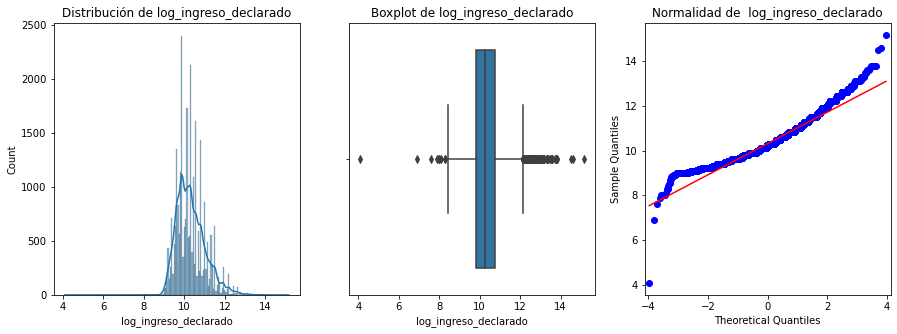

In [18]:
plot_dist_box_qqplot(df, "log_ingreso_declarado")



> "El salario mínimo comprende un referente del monto económico irreductible que debe,
por mandato jurídico, percibir diariamente toda persona que realiza un trabajo personal
y subordinado, a efecto de satisfacer sus necesidades básicas y las de su familia, en el
orden material, social y cultural, y para proveer la educación obligatoria de sus hijos,
según lo establece el artículo 123 constitucional, apartado A, fracción VI" [https://www.cndh.org.mx/sites/all/doc/Informes/Especiales/Salario-Minimo-DH.pdf]

Dada esta definición proponemos utilizar el valor del salario mínimo durante 2021 para discretizar la variable y permitir un analisis en relación a la capacidad de pago. Entendemos que el ingreso disponible es distinto al ingreso percibido y por lo tanto no necesariamente un ingreso mayor significa una capacidad de pago mayor. Sin embargo para entender cómo está compuesta nuestra muestra vale la pena entender por cada cliente, cuantas veces puede satisfacer sus necesidades básiscas. Consideramos está discretización mas entendible que las anteriores comparaciones. (https://www.gob.mx/stps/prensa/comunicado-conjunto-289406)


,Cantidad Clientes,Proporcion Muestra,Mexico,% Poblacion Mexico
Ingreso Real,,,,
Hasta 1 salario min,0.0,0.0%,10642543,24.261%
1 hasta 2 salarios,43.0,0.2%,17141160,39.076%
2 hasta 3 salarios,2265.0,8.4%,9818858,22.383%
3 hasta 5 salarios,7721.0,28.7%,4522674,10.31%
+ de 5 salarios,16904.0,62.8%,1741491,3.97%
Total,26933.0,100.1%,43866726,100.0%


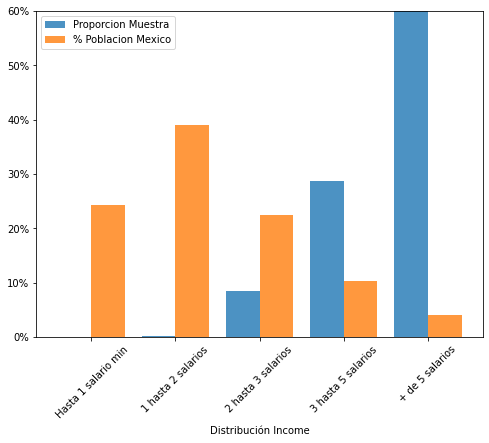

In [19]:
df["ratio_income_min_w"] = df["ingreso_real"]/4000

lst = [df]
for column in lst:
    column.loc[column["ratio_income_min_w"] <= 1,  'salarios_min'] = " Hasta 1 salario min"
    column.loc[(column["ratio_income_min_w"] > 1) & (column["ratio_income_min_w"] <= 2), 'salarios_min'] = "1 hasta 2 salarios"
    column.loc[(column["ratio_income_min_w"] > 2) & (column["ratio_income_min_w"] <= 3), 'salarios_min'] = "2 hasta 3 salarios"
    column.loc[(column["ratio_income_min_w"] > 3) & (column["ratio_income_min_w"] <= 5), 'salarios_min'] = "3 hasta 5 salarios"
    column.loc[column["ratio_income_min_w"] >5, 'salarios_min'] = "+ de 5 salarios"

reorder_salariosmin = [" Hasta 1 salario min", "1 hasta 2 salarios","2 hasta 3 salarios","3 hasta 5 salarios", "+ de 5 salarios"]

cantidad = df.groupby(["salarios_min"]).agg(
    Cantidad =  ('salarios_min', 'count')).reindex(reorder_salariosmin)
proporcion = df.salarios_min.value_counts(normalize=True).reindex(reorder_salariosmin).round(3)
inegi_df = pd.merge(cantidad,proporcion, right_index=True, left_index=True)
inegi_df.columns = ["Cantidad Clientes ","Proporcion Muestra"]
inegi_df = inegi_df.reindex(reorder_salariosmin)
inegi_df.loc['Total',:]= inegi_df.sum(axis=0)
inegi_df.fillna(0, inplace=True)


inegi_df.index.name = "Ingreso Real"
inegi_df["Mexico"] = [10642543,17141160,9818858,4522674,1741491,43866726]
inegi_df["% Poblacion Mexico"] = [valor/43866726 for valor in inegi_df["Mexico"]]
inegi_plot = inegi_df.copy()
inegi_df["% Poblacion Mexico"] = ((inegi_df["% Poblacion Mexico"]*100).round(3)).astype(str) + '%'
inegi_df["Proporcion Muestra"] = ((inegi_df["Proporcion Muestra"]*100).round(2)).astype(str) + '%'
inegi_plot =inegi_plot.reset_index(level=0)
inegi_plot[0:5].plot(x="Ingreso Real",y=["Proporcion Muestra","% Poblacion Mexico"], kind="bar", width=0.8, alpha=0.8, align='center',figsize=(8,6)).set_ylim([0,0.6])
current_values = plt.gca().get_yticks()
# using format string '{:.0f}' here but you can choose others
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in current_values])
plt.xticks(rotation=45)

plt.xlabel('Distribución Income')

inegi_df

Texto de comparativa de distribuciones poblacion vs muestra.

Propuesta de más bins para discretizar

In [20]:
lst = [df]
for column in lst:
    column.loc[(column["ratio_income_min_w"] > 1) & (column["ratio_income_min_w"] <= 2), 'salarios_min'] = "1 hasta 2 salarios"
    column.loc[(column["ratio_income_min_w"] > 2) & (column["ratio_income_min_w"] <= 3), 'salarios_min'] = "2 hasta 3 salarios"
    column.loc[(column["ratio_income_min_w"] > 3) & (column["ratio_income_min_w"] <= 5), 'salarios_min'] = "3 hasta 5 salarios"
    column.loc[(column["ratio_income_min_w"] > 5) & (column["ratio_income_min_w"] <= 8), 'salarios_min'] = "5 hasta 8 salarios"
    column.loc[(column["ratio_income_min_w"] > 8) & (column["ratio_income_min_w"] <= 12), 'salarios_min'] = "8 hasta 12 salarios"
    column.loc[(column["ratio_income_min_w"] > 12) & (column["ratio_income_min_w"] <= 16), 'salarios_min'] = "12 hasta 16 salarios"
    column.loc[column["ratio_income_min_w"] >16, 'salarios_min'] = "+ de 16 salarios"

reorder_salariosmin = [ "1 hasta 2 salarios","2 hasta 3 salarios","3 hasta 5 salarios","5 hasta 8 salarios" ,"8 hasta 12 salarios","12 hasta 16 salarios","+ de 16 salarios"]

# Declaración de ingresos


$$
Declaran = \frac
{Declared
Income - True
Income}{True
Income}
$$

Diferencia del 30% puede ser entre bruto y neto. Discretización arbitaria

El gran problema representa 2854 clientes y representa el 10.60% de la población que conocemos el ingreso real 



,Cantidad Clientes,Proporcion
Declaran,,
Más del 100%,723,3.0%
entre 51% y 99% más,1064,4.0%
entre 31% y 50% más,1067,4.0%
entre 1% y 30% más,3421,13.0%
Lo Mismo,17223,64.0%
Menos,3435,13.0%
Total,26933,100.0%


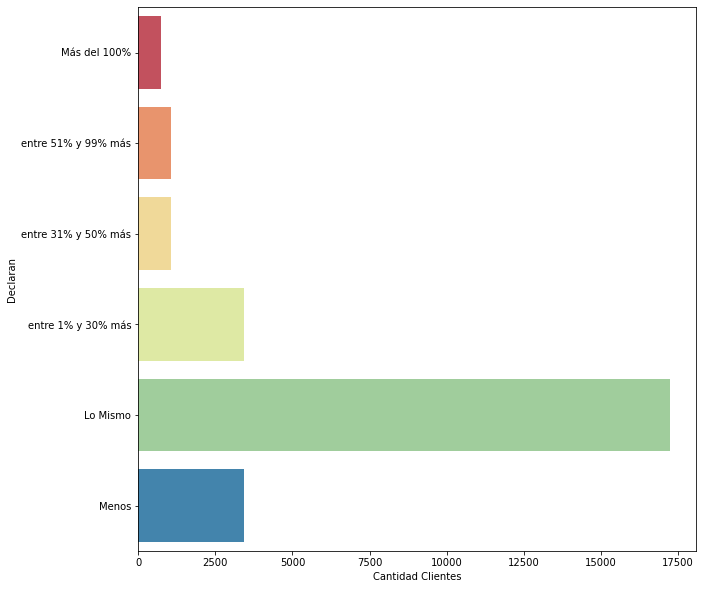

In [21]:

df["diff_per"] = (df["ingreso_declarado"] - df["ingreso_real"]) / df["ingreso_real"]

#dataframe.loc[(condicion),columnas en particular]
df.loc[df["diff_per"] == 0, 'Declaran'] = "Lo Mismo"
df.loc[(df["diff_per"] < 0), 'Declaran'] = "Menos"
df.loc[(df["diff_per"] > 0) & (df["diff_per"] <= 0.3), 'Declaran'] = "entre 1% y 30% más"
df.loc[(df["diff_per"] > 0.3) & (df["diff_per"] <= 0.5), 'Declaran'] = "entre 31% y 50% más"
df.loc[(df["diff_per"] > 0.5) & (df["diff_per"] < 1), 'Declaran'] = "entre 51% y 99% más"
df.loc[(df["diff_per"] >= 1), 'Declaran'] = "Más del 100%"
reorderlist = ["Más del 100%", "entre 51% y 99% más", "entre 31% y 50% más", "entre 1% y 30% más", "Lo Mismo", "Menos"]

declararon = pd.merge(df.Declaran.value_counts(), df.Declaran.value_counts(normalize=True), right_index=True,
                      left_index=True)
declararon.columns = ["Cantidad Clientes", "Proporcion"]
declararon = declararon.reindex(reorderlist)
declararon.index.name = "Declaran"

plt.figure(figsize=(10, 10))
paleta = ["#d53e4f", "#fc8d59", "#fee08b", "#e6f598", "#99d594", "#3288bd"]
sns.barplot(x="Cantidad Clientes", y=declararon.index, data=declararon, palette=paleta)
plt.savefig("cantidad.png", bbox_inches='tight')
declararon.loc['Total', :] = declararon.sum(axis=0)

per_problema = declararon[0:3]["Proporcion"].sum(axis=0)

declararon["Proporcion"] = (declararon["Proporcion"].round(2) * 100).astype(str) + '%'
declararon["Cantidad Clientes"] = declararon["Cantidad Clientes"].astype(int)
total_problema = declararon[0:3]["Cantidad Clientes"].sum(axis=0)

print(  f"El gran problema representa {total_problema} clientes y representa el {(per_problema * 100):.2f}% de la población que conocemos el ingreso real \n")
declararon

# Declaracion por Minimos de ingresos

Crosstab

Text(0.5, 1.0, 'Matriz nro.1 \n\n Cantidad de Clientes\n Ingreso declarado vs Verdadero\n')

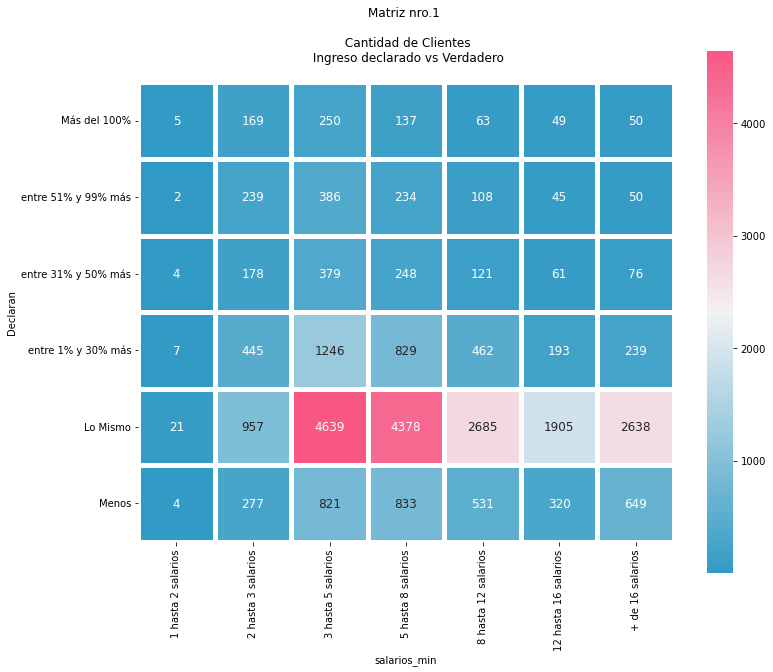

In [22]:
plt.rcParams['figure.facecolor'] = 'white'

ingreso_diff = pd.crosstab(df['Declaran'],df['salarios_min']).reindex(reorderlist)
reorder_salariosmin = [col for col in reorder_salariosmin if col in ingreso_diff.columns]
ingreso_diff = ingreso_diff[reorder_salariosmin]

fig, ax = plt.subplots(figsize=(12, 12))
# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True).reversed()
# plot heatmap
sns.despine(left=True)

sns.heatmap(ingreso_diff,annot=True,annot_kws={"size": 12}, fmt=".0f",
           linewidths=5, cmap=cmap,
           cbar_kws={"shrink": .8}, square=True).set_title("Matriz nro.1 \n\n Cantidad de Clientes\n Ingreso declarado vs Verdadero\n")


#fig.savefig("../figures/Ingreso_declarado_vs_Verdadero.png")

# Proporciones

Del total de clientes según su salario mínimo, ¿Cómo declara?

Text(0.5, 1.0, 'Matriz nro.2 \n\n Porcentaje de Clientes\n Ingreso declarado vs Verdadero\n')

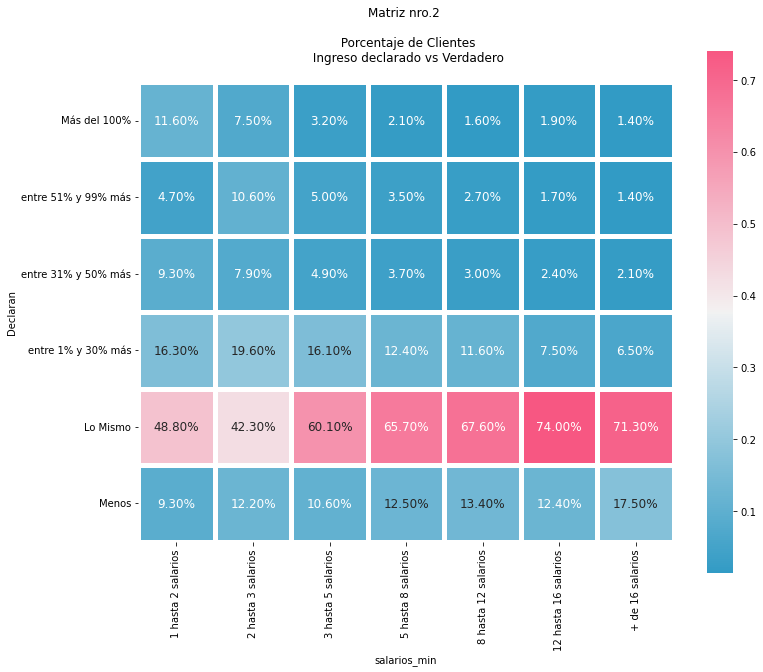

In [23]:
ingreso_per = ingreso_diff.T.apply(lambda x: round(x/x.sum(),3), axis=1)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(ingreso_per.T,annot=True,annot_kws={"size": 12}, fmt=".2%",
           linewidths=5, cmap=cmap,
           cbar_kws={"shrink": .8}, square=True).set_title("Matriz nro.2 \n\n Porcentaje de Clientes\n Ingreso declarado vs Verdadero\n")


# Metrica Mape

Tomo en cuenta la columna de lo declarado cómo si fuese el valor de un modelo


$MAPE = \frac{1}{T} \sum_{t=1}^T 100\, |\frac{y_{true} - y_{pred}}{y_{true}}|$



In [24]:
def MAPE(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / y_true)

In [25]:
df["mape"] = df.apply(lambda x: MAPE(x["ingreso_real"], x["ingreso_declarado"]), axis=1)
df["residuals"] = df.apply(lambda x: (x["ingreso_declarado"]-x["ingreso_real"]), axis=1)

tabla_resultados = df.groupby(["salarios_min"]).agg(
        Mape_promedio =  ('mape', 'mean'),
        Diferencia_promedio = ('residuals', 'mean'),
        Cantidad_clientes =  ('mape', 'count'))

tabla_resultados = tabla_resultados.reindex(reorder_salariosmin)
print(tabla_resultados)

                      Mape_promedio  Diferencia_promedio  Cantidad_clientes
salarios_min                                                               
1 hasta 2 salarios         0.702257          5423.033260                 43
2 hasta 3 salarios         0.296874          2915.988717               2265
3 hasta 5 salarios         0.153350          2127.020033               7721
5 hasta 8 salarios         0.110428          1961.973662               6659
8 hasta 12 salarios        0.127590          2809.488182               3970
12 hasta 16 salarios       0.102302          1868.008339               2573
+ de 16 salarios           0.136488       -206257.197022               3702


# Correlograma

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

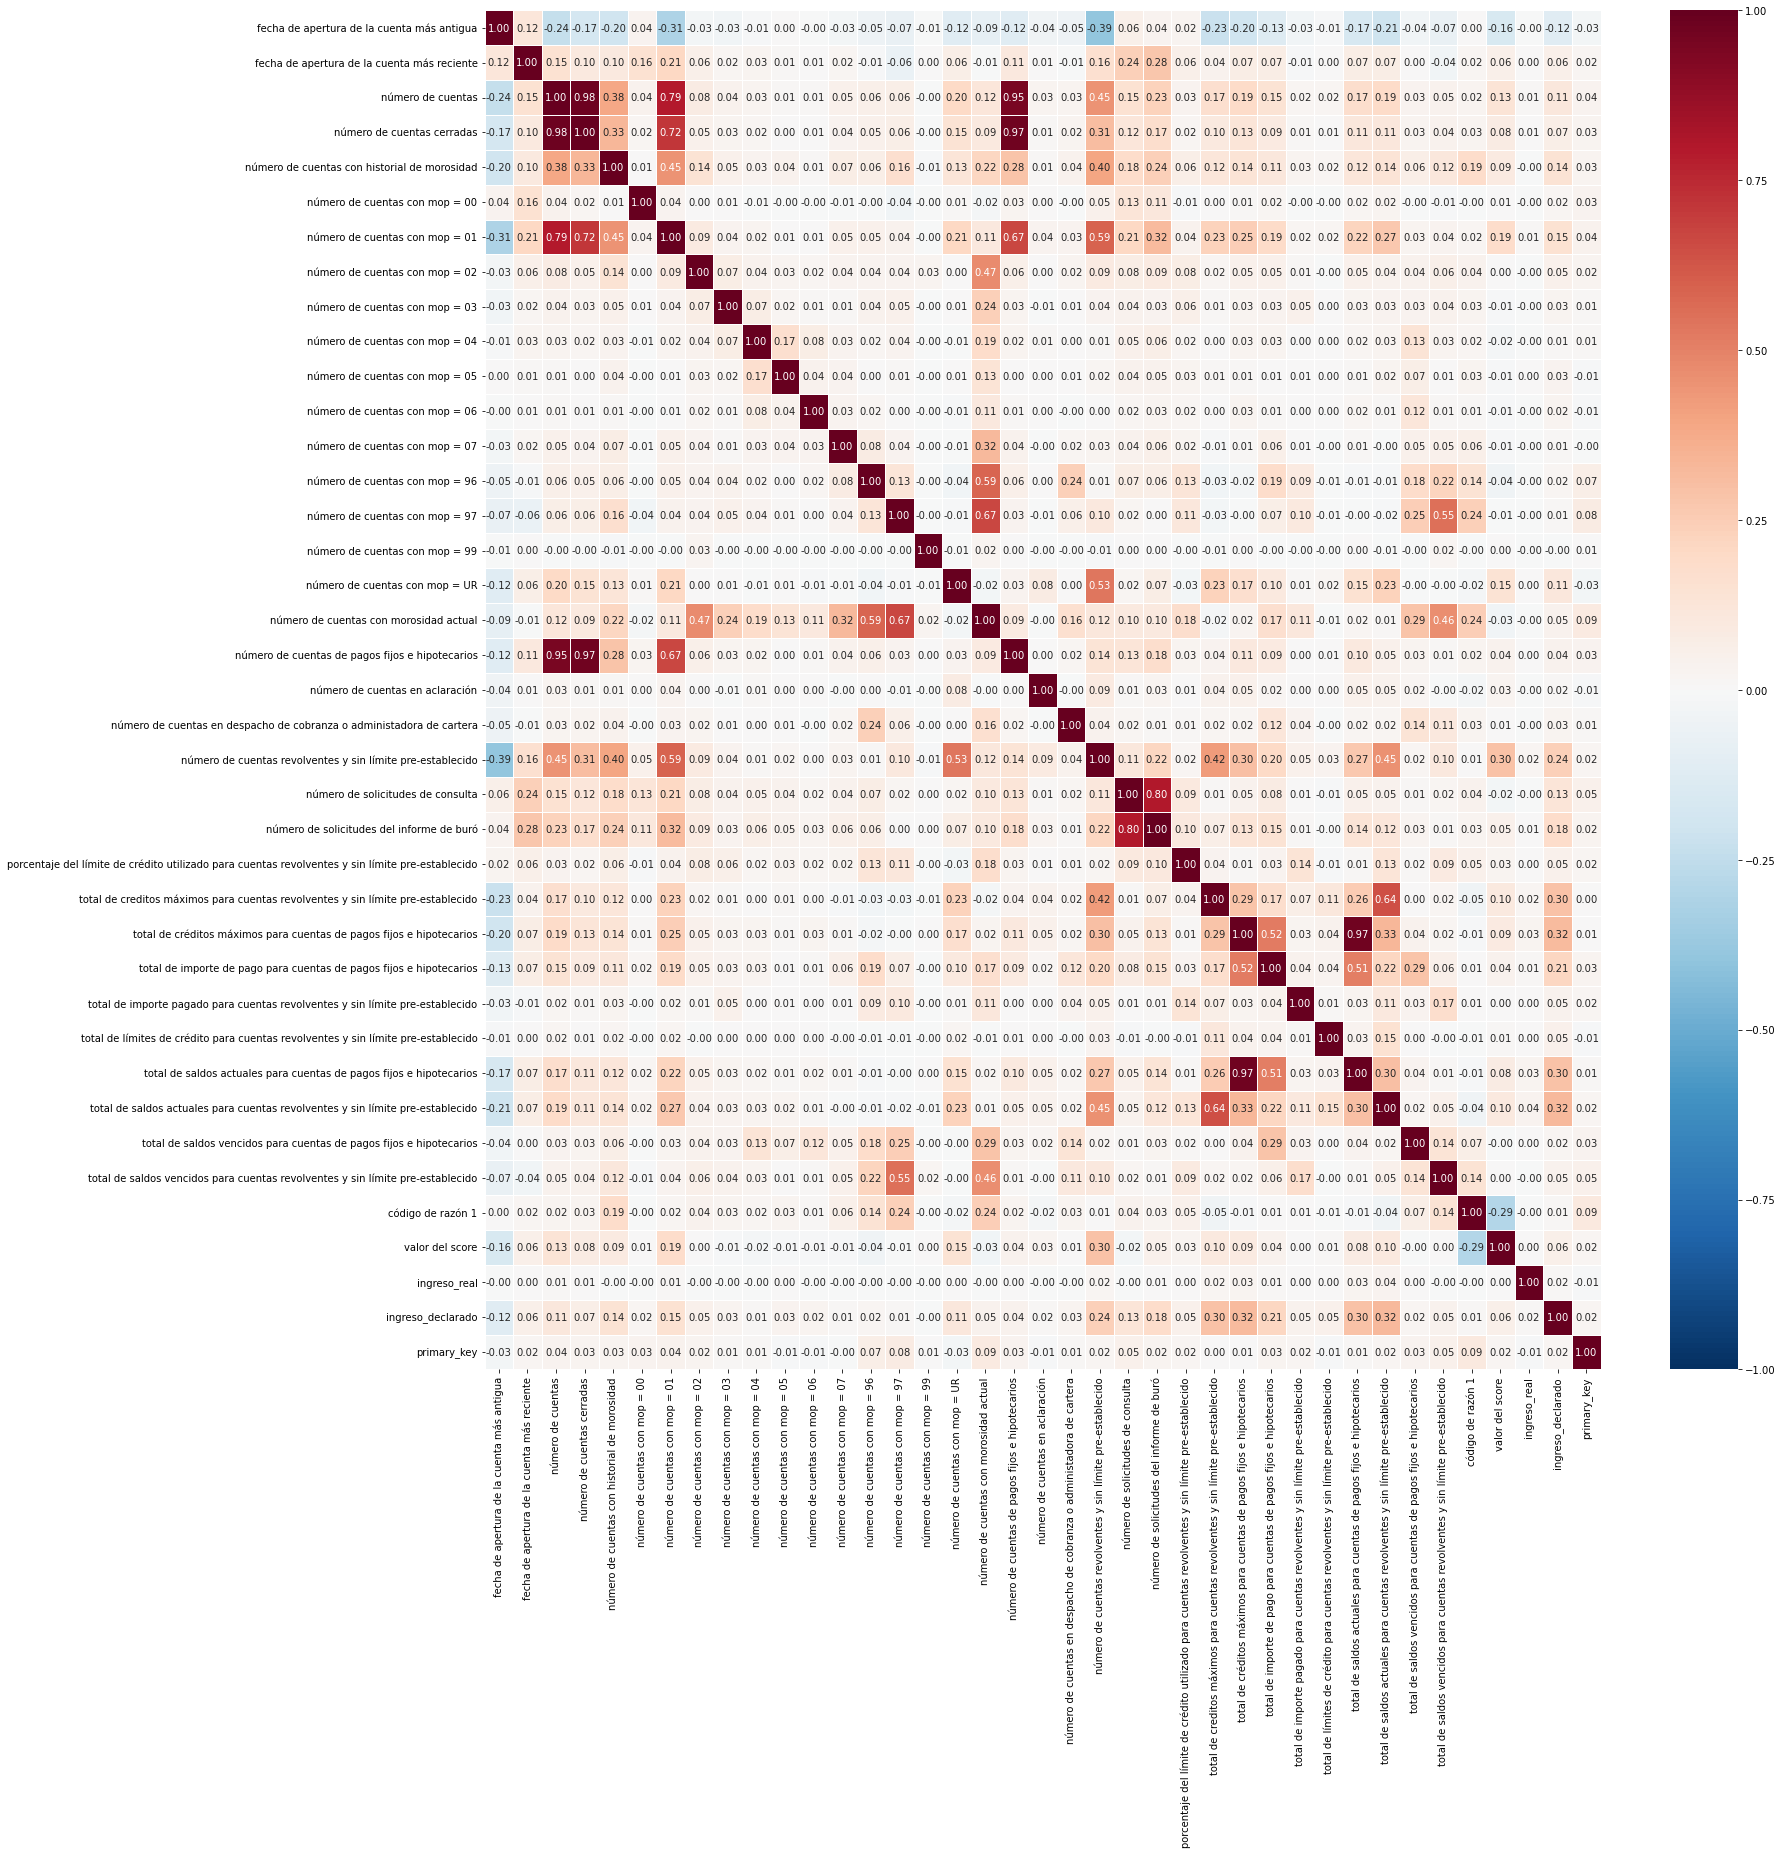

In [26]:
import numpy as np

fig = plt.figure()
plt.figure(figsize=(25, 25))
corr= raw_df.corr()

matrix = np.triu(corr)

sns.heatmap(corr,fmt=".2f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0,annot =True, cmap="RdBu_r")

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

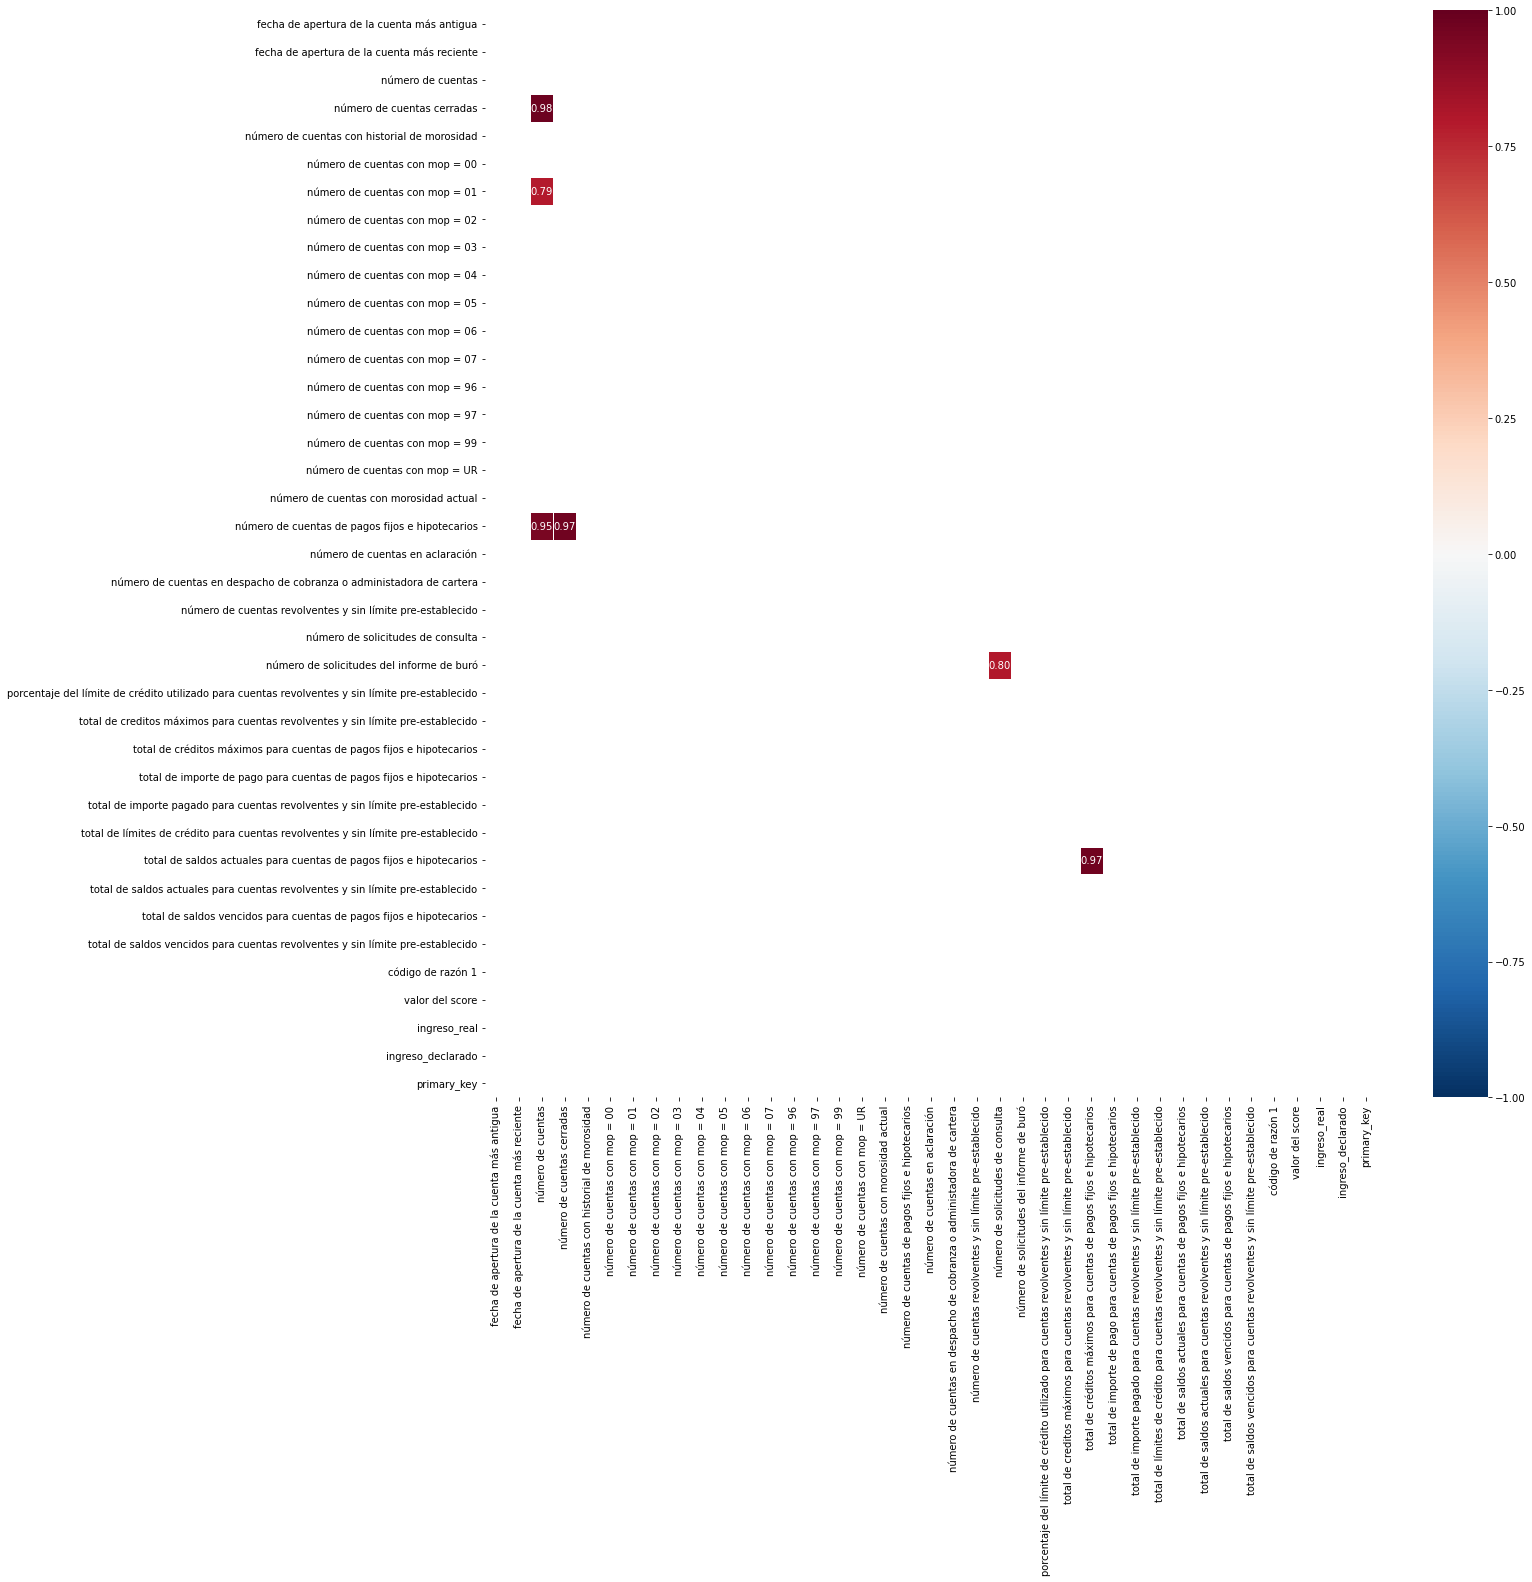

In [27]:
fig = plt.figure()
plt.figure(figsize=(20, 20))
corr= raw_df.corr()
corr = corr[(corr>= 0.75) | (corr<= -0.75) ]
matrix = np.triu(corr)

sns.heatmap(corr,fmt=".2f",
            vmin=-1, vmax=1, linewidth = 1,
            center=0,annot =True, cmap="RdBu_r", mask=matrix)

In [28]:
corr.unstack().sort_values().drop_duplicates()

número de cuentas                                                                                 número de cuentas con mop = 01                                                                      0.791381
número de solicitudes de consulta                                                                 número de solicitudes del informe de buró                                                           0.802037
número de cuentas de pagos fijos e hipotecarios                                                   número de cuentas                                                                                   0.947545
total de saldos actuales para cuentas de pagos fijos e hipotecarios                               total de créditos máximos para cuentas de pagos fijos e hipotecarios                                0.972496
número de cuentas de pagos fijos e hipotecarios                                                   número de cuentas cerradas                                                

39

# Plot distributions

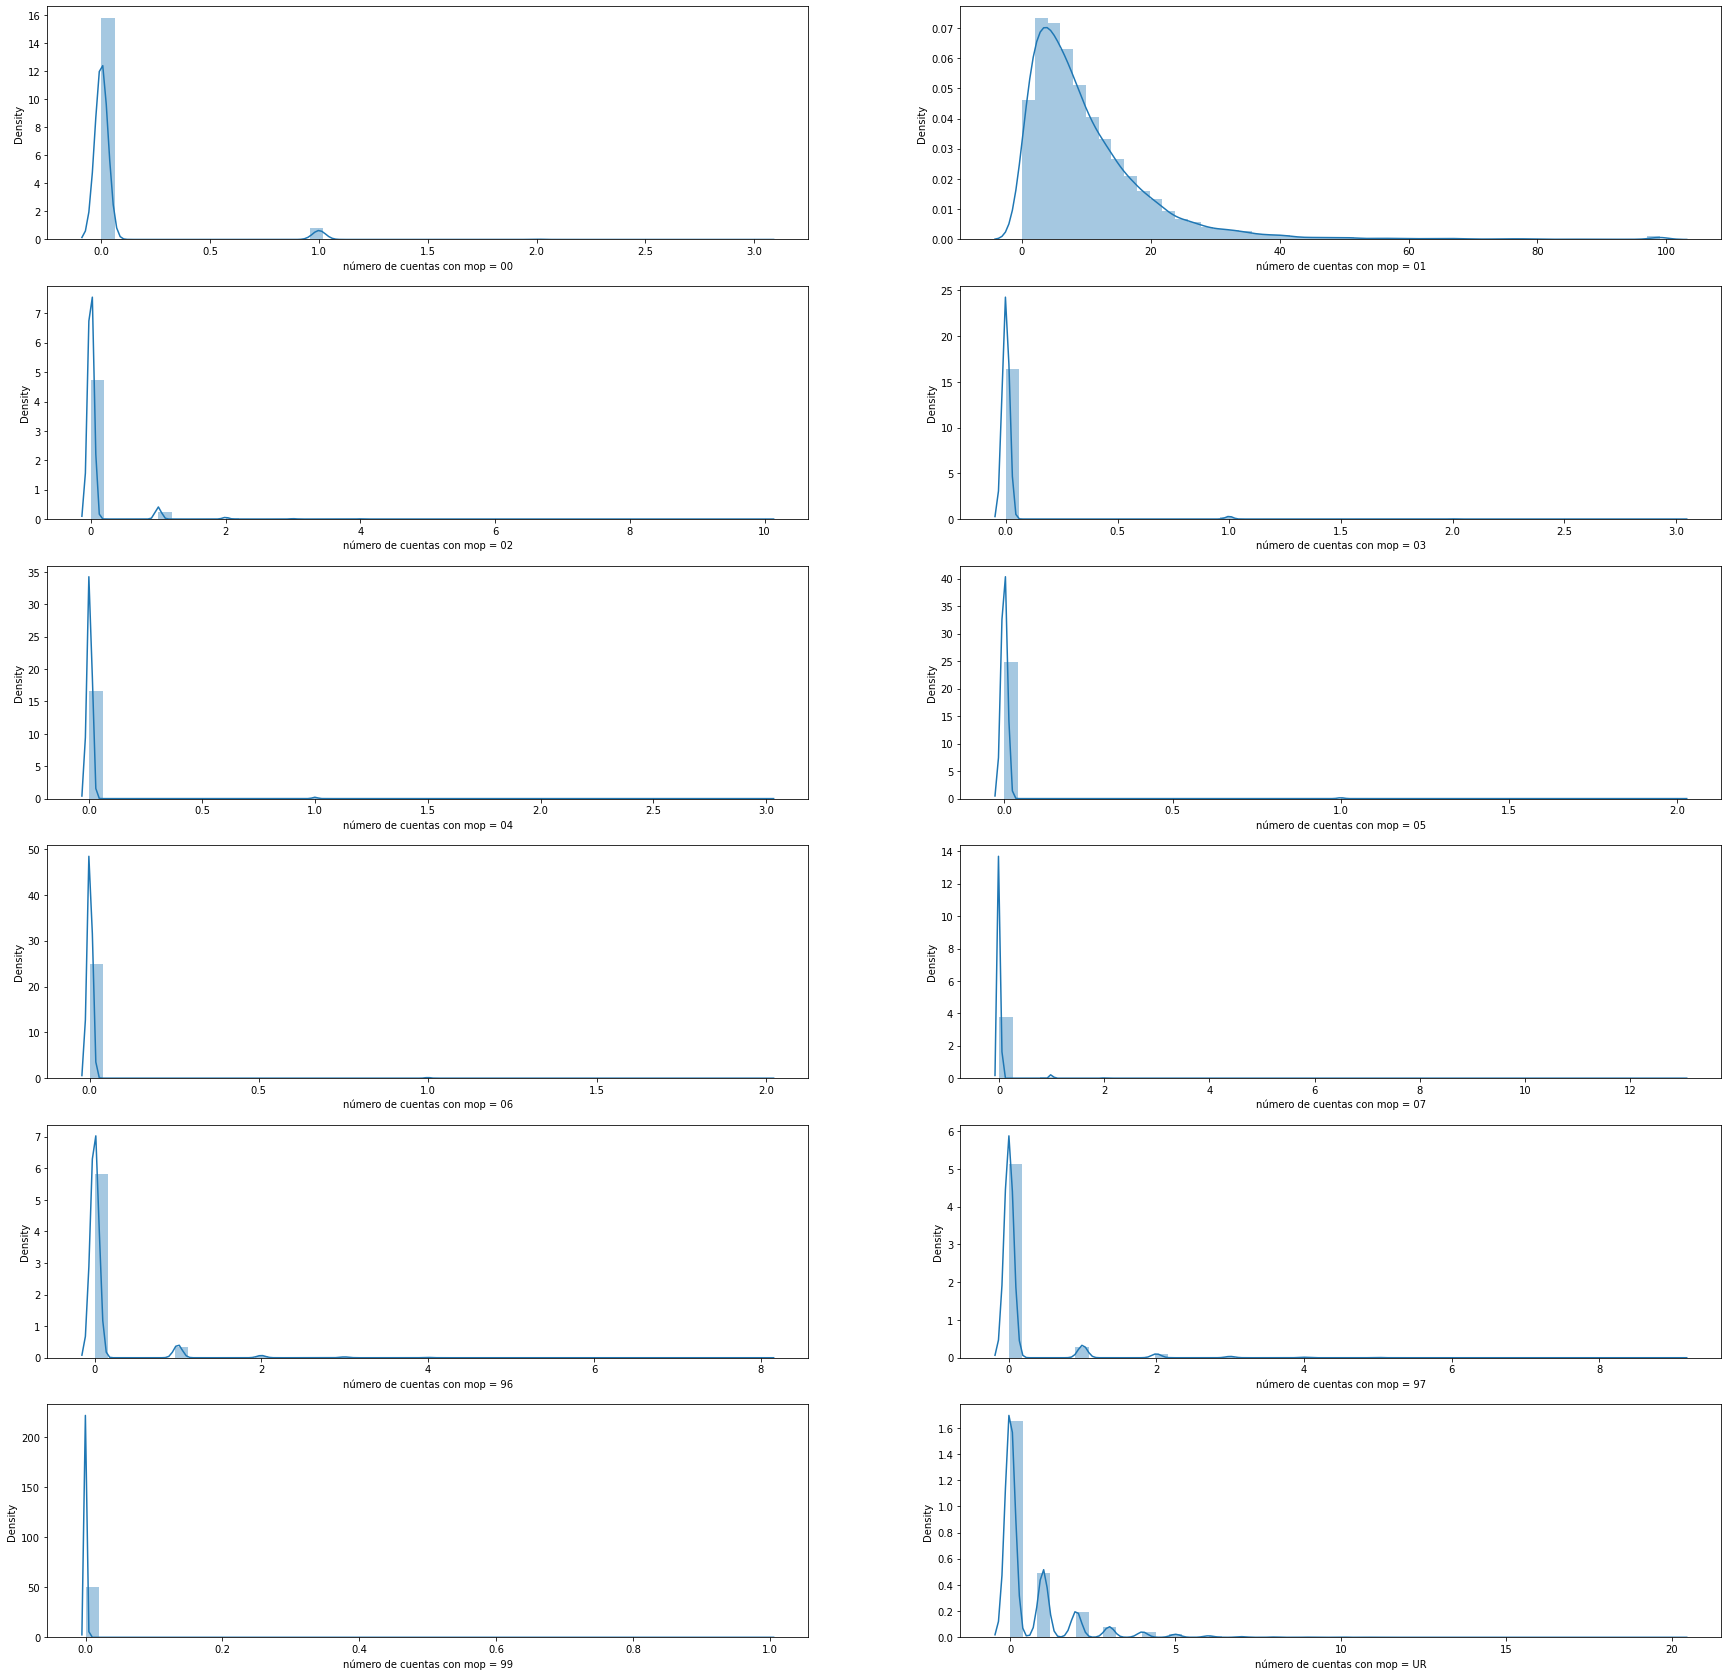

In [30]:
variables = mop
n_rows= int(len(variables)/2)
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30,30))
for i, column in enumerate(variables):
    sns.distplot(raw_df[column],ax=axes[i//n_cols,i%n_cols])

<AxesSubplot:xlabel='fecha de apertura de la cuenta más reciente', ylabel='Density'>

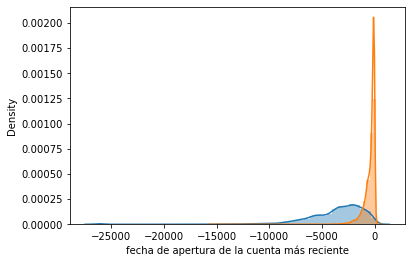

In [52]:
sns.distplot(raw_df['fecha de apertura de la cuenta más antigua'])
sns.distplot(raw_df['fecha de apertura de la cuenta más reciente'])

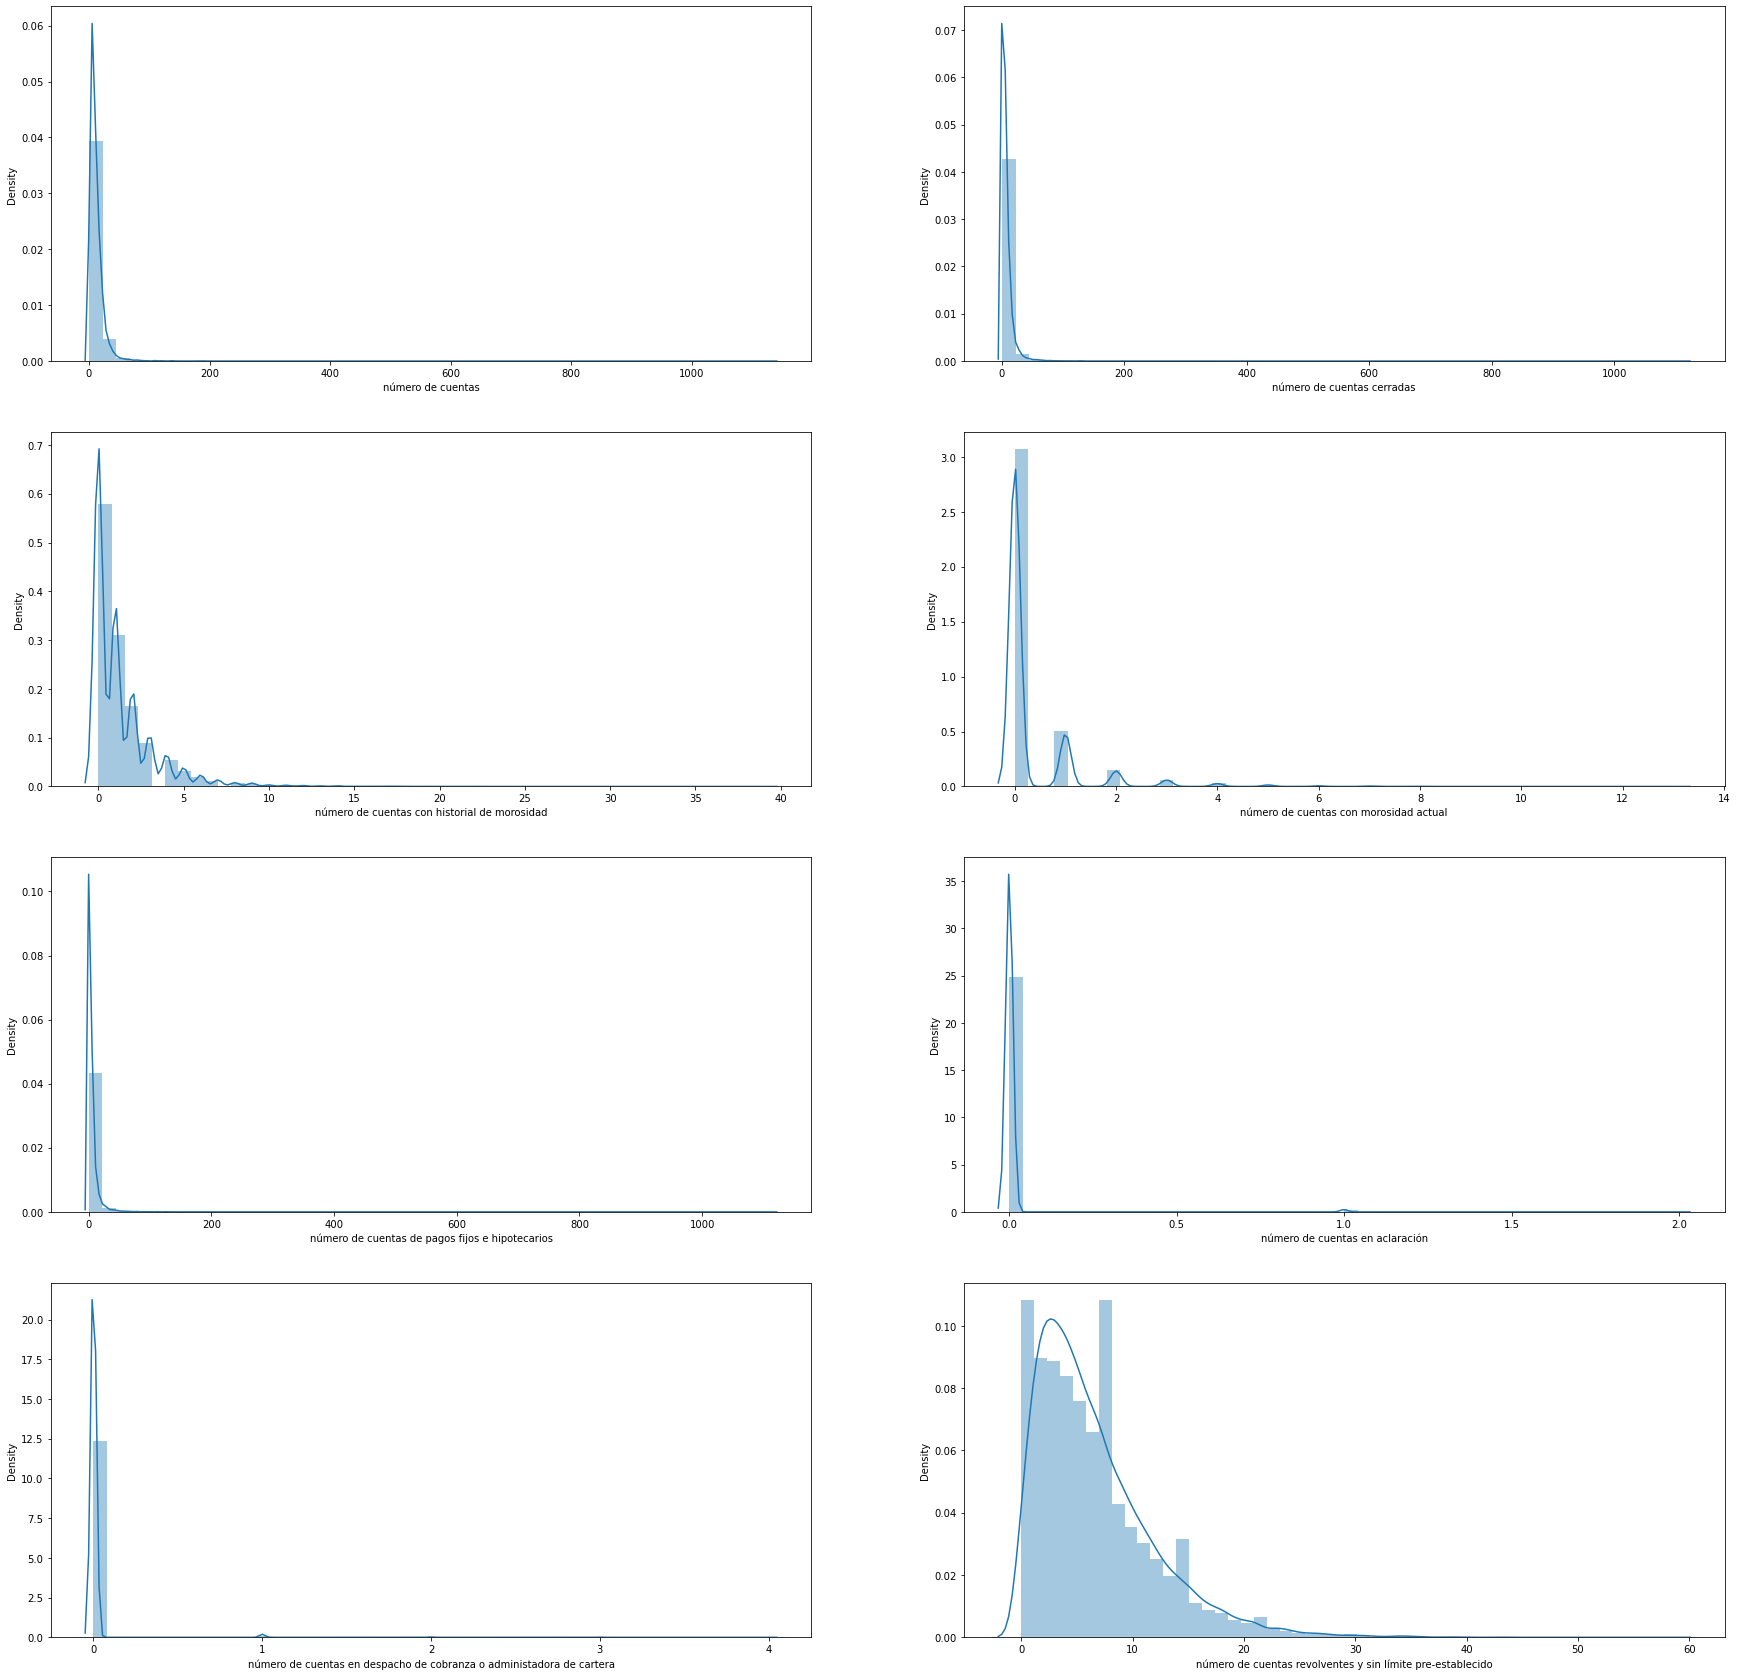

In [38]:
variables = cuentas
n_rows= int(len(variables)/2)
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30,30))
for i, column in enumerate(variables):
    sns.distplot(raw_df[column],ax=axes[i//n_cols,i%n_cols])

<AxesSubplot:xlabel='total de créditos máximos para cuentas de pagos fijos e hipotecarios', ylabel='Density'>

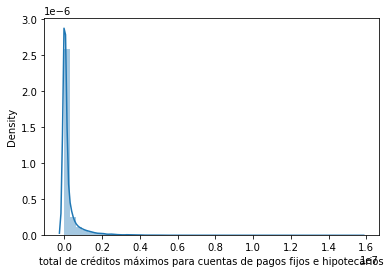

In [55]:
sns.distplot(raw_df['total de créditos máximos para cuentas de pagos fijos e hipotecarios'])


<AxesSubplot:xlabel='total de límites de crédito para cuentas revolventes y sin límite pre-establecido', ylabel='Density'>

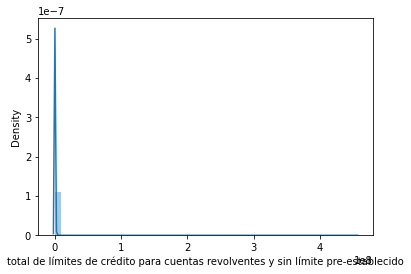

In [56]:
sns.distplot(raw_df['total de límites de crédito para cuentas revolventes y sin límite pre-establecido'])

In [53]:
endeudamiento

['porcentaje del límite de crédito utilizado para cuentas revolventes y sin límite pre-establecido',
 'total de créditos máximos para cuentas de pagos fijos e hipotecarios',
 'total de límites de crédito para cuentas revolventes y sin límite pre-establecido']

IndexError: index 2 is out of bounds for axis 0 with size 2

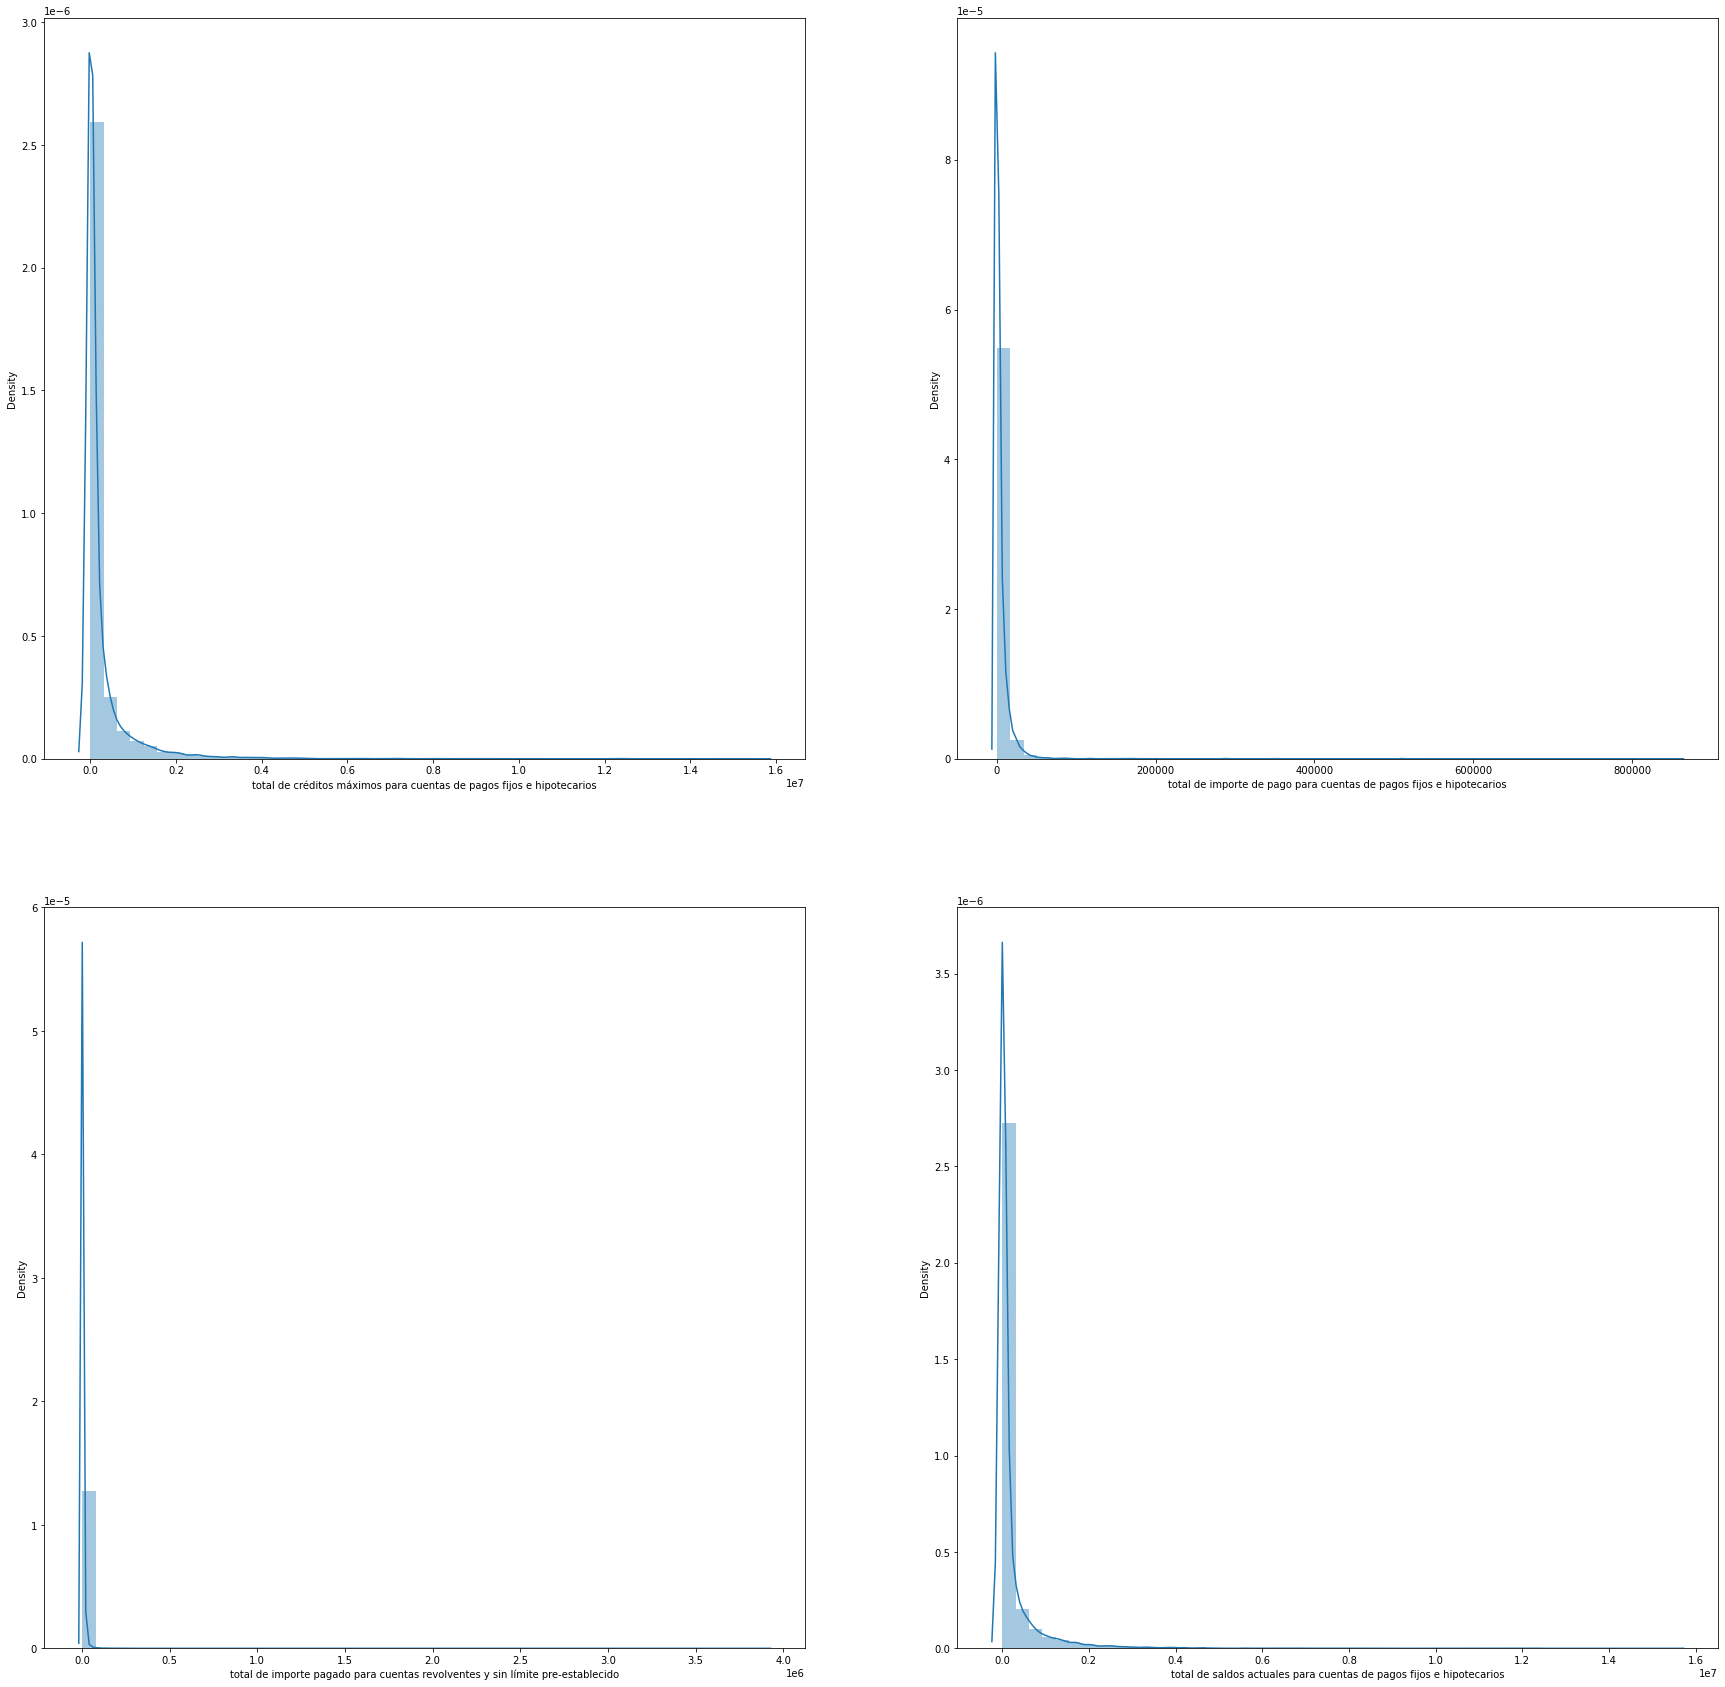

In [58]:
variables = pagado
n_rows= int(len(variables)/2)
n_cols=2
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols,figsize=(30,30))
for i, column in enumerate(variables):
    sns.distplot(raw_df[column],ax=axes[i//n_cols,i%n_cols])

In [60]:
pagado

['total de créditos máximos para cuentas de pagos fijos e hipotecarios',
 'total de importe de pago para cuentas de pagos fijos e hipotecarios',
 'total de importe pagado para cuentas revolventes y sin límite pre-establecido',
 'total de saldos actuales para cuentas de pagos fijos e hipotecarios',
 'total de saldos vencidos para cuentas de pagos fijos e hipotecarios']

In [ ]:
len(mop + fechas + cuentas + endeudamiento + pagado  + saldos + score + declarado + target)


# Regresion

Tomo en cuenta las variables por el diccionario

# Ligthgbm

# Capacidad de Pago

## Matrices de confusion.